<a href="https://colab.research.google.com/github/Abhs1897/Machine-Learning/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
######################## Implmentation 1 ###########################################



####################################################################################
import numpy as np

class Perceptron:
  def __init__(self, learning_rate=0.01, n_iters=50):
    self.lr = learning_rate
    self.n_iters = n_iters

  def fit(self, X, y):
    self.weights = np.random.normal(loc=0.0,scale=1.0,size=X.shape[1])
    self.bias=np.float_(0.0)
    self.error_list=[]

    for _ in range(self.n_iters):
      errors=0
      for xi,target in zip(X,y):
        update=self.lr*(target-self.predict(xi))
        self.weights+=update*xi
        self.bias=update
        errors+=int(update!=0.0)
      self.error_list.append(errors)
    return self
  def net_input(self, X):
    return np.dot(X, self.weights) + self.bias
  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, 0)

In [68]:
import os
import pandas as pd
import matplotlib.pyplot as plt

url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df=pd.read_csv(url,header=None,encoding='utf-8')
df.sample(10)

,0,1,2,3,4
27,5.2,3.5,1.5,0.2,Iris-setosa
28,5.2,3.4,1.4,0.2,Iris-setosa
119,6.0,2.2,5.0,1.5,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa
97,6.2,2.9,4.3,1.3,Iris-versicolor
10,5.4,3.7,1.5,0.2,Iris-setosa
133,6.3,2.8,5.1,1.5,Iris-virginica
36,5.5,3.5,1.3,0.2,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


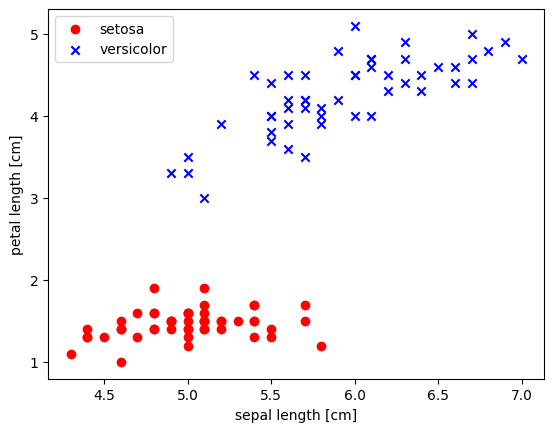

In [69]:
#Data visualization
X=df.iloc[0:100,[0,2]].values
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',-1,1)

plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

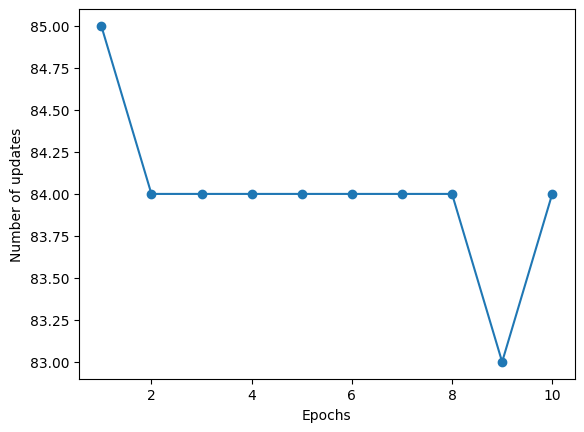

In [70]:
ppn=Perceptron(learning_rate=0.1, n_iters=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.error_list)+1),ppn.error_list,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [71]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
  # setup marker generator and color map
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  # plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
    y=X[y == cl, 1],
    alpha=0.8,
    c=colors[idx],
    marker=markers[idx],
    label=f'Class {cl}',
    edgecolor='black')

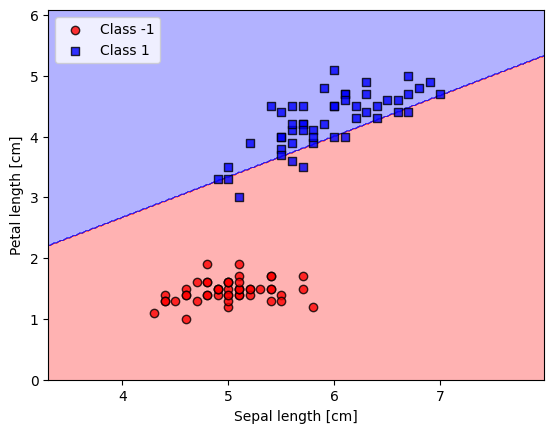

In [72]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [73]:
######################## Implmentation 2 ###########################################



####################################################################################


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#download text from the url='https://github.com/rasbt/stat453-deep-learning-ss21/blob/main/L03/code/perceptron_toydata.txt'
data = np.genfromtxt('perceptron_toydata.txt', delimiter='\t')

In [74]:
X,y=data[:,:2],data[:,2]

In [75]:
y=y.astype(np.int64)

In [76]:
print("Labels Count:",np.bincount(y))
print("X.shape:",X.shape)
print("y.shape:",y.shape)

Labels Count: [50 50]
X.shape: (100, 2)
y.shape: (100,)


In [77]:
# Shuffling & train/test split
shuffle_index=np.arange(y.shape[0])
shuffle_range=np.random.RandomState(123)
shuffle_range.shuffle(shuffle_index)
X,y=X[shuffle_index],y[shuffle_index]

In [78]:
X_train,X_test=X[shuffle_index[:70]],X[shuffle_index[70:]]
y_train,y_test=y[shuffle_index[:70]],y[shuffle_index[70:]]

In [79]:
#Normalizing data
mean,variance=X_train.mean(axis=0),X_train.std(axis=0)
X_train=(X_train-mean)/variance
X_test=(X_test-mean)/variance

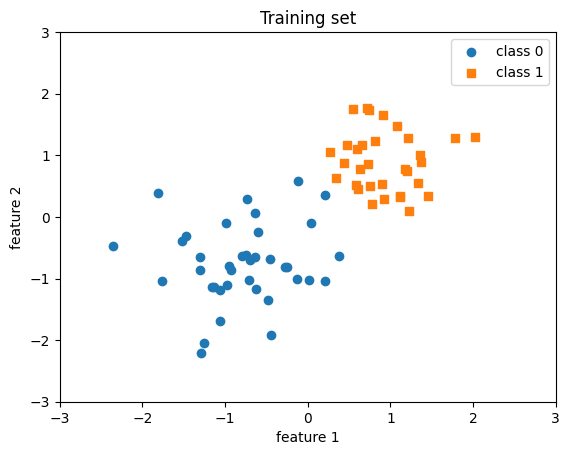

In [80]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

In [85]:
## Defining Perceptron

class Perceptron:
  def __init__(self, num_features):
    self.num_features = num_features
    self.weights = np.zeros((num_features,1),dtype=np.float16)
    self.bias = np.zeros(1,dtype=np.float16)

  def predict(self,x):
    linear=np.dot(x,self.weights)+self.bias
    predictions=np.where(linear>0,1,0)
    return predictions
  def backwards(self,x,y):
    predictions=self.predict(x)
    errors=y-predictions
    return errors
  def train(self,x,y,epochs):
    for _ in range(epochs):
      errors=0
      for i in range(x.shape[0]):
        update=self.backwards(x[i].reshape(1,self.num_features),y[i]).reshape(-1)
        self.weights+=(update*x[i]).reshape(self.num_features,1)
        self.bias+=update
  def evaluate(self,x,y):
    predictions=self.predict(x).reshape(-1)
    accuracy=np.sum(predictions==y)/y.shape[0]
    return accuracy

In [86]:
ppn = Perceptron(num_features=2)

ppn.train(X_train, y_train, epochs=5)

print('Model parameters:\n\n')
print('  Weights: %s\n' % ppn.weights)
print('  Bias: %s\n' % ppn.bias)

Model parameters:


  Weights: [[1.273]
 [1.347]]

  Bias: [-1.]



In [87]:
train_acc = ppn.evaluate(X_train, y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

Train set accuracy: 100.00%


In [88]:
test_acc = ppn.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 93.33%


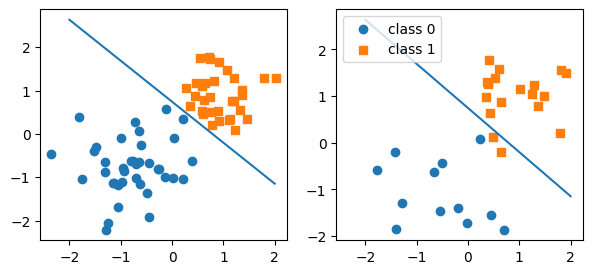

In [89]:
##########################
### 2D Decision Boundary
##########################

w, b = ppn.weights, ppn.bias

x0_min = -2
x1_min = ( (-(w[0] * x0_min) - b[0])
          / w[1] )

x0_max = 2
x1_max = ( (-(w[0] * x0_max) - b[0])
          / w[1] )

# x0*w0 + x1*w1 + b = 0
# x1  = (-x0*w0 - b) / w1


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x0_min, x0_max], [x1_min, x1_max])
ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].plot([x0_min, x0_max], [x1_min, x1_max])
ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()